### **SHAPEAI - DATA SCIENTIST TRAINING & INTERNSHIP**

### **Author : Midhir Nambiar**

### **Task : Support Vector Regressor**

Outline:

1. Importing Dataset
2. Data Analysis
3. Feature Scaling
4. Train-Test Split
5. Model Building
6. Model Evaluation

Problem Statement - In this dataset we have one independent feature which is 'Hours of Study' and one dependent variable which is 'Marks'. We have to train our SVR model to understand the relationship between the 'Hours' and 'Marks' to predict student's marks based on their number of hours dedicated to study

**Importing Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# For regular expressions
import re
# For score purpose
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

**Data Analysis**

In [3]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
df.tail()

,Hours of Study,Marks
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [5]:
print(df.shape)

(100, 2)


In [6]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

In [9]:
df.rename(columns={'Hours of Study' : 'Hours'},inplace = True)
df

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


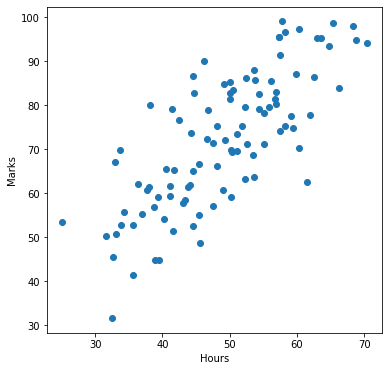

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(df.Hours , df.Marks)
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()

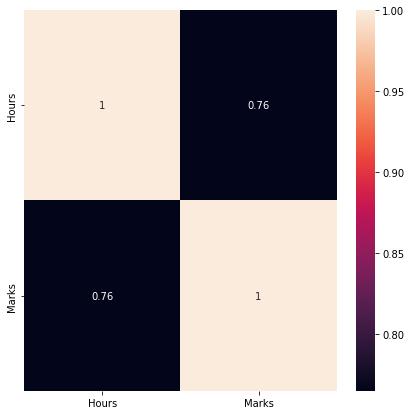

In [11]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

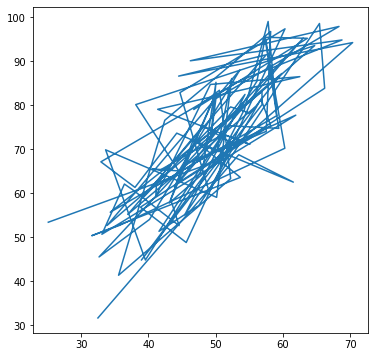

In [12]:
plt.figure(figsize=(6,6))
plt.plot(df.Hours , df.Marks)
plt.show()

**Feature Scaling**

Here , the choice of Feature Scaling is upto you since there is not much difference.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# x = df['Marks'] also works 
y = df.iloc[:,-1].values
y

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319,
       83.87856466, 98.5912173 , 57.25181946, 51.39174408, 75.38065167,
       74.76556403, 95.45505292, 95.22936602, 79.05240617, 83.43207142,
       63.35879032, 41.4128853 , 76.61734128, 96.76956643, 74.08413012,
       66.58814441, 77.76848242, 50.71958891, 62.12457082, 60.81024665,
       52.68298337, 58.56982472, 82.90598149, 61.4247098 , 95.2441528 ,
       45.57058882, 54.0840548 , 87.99445276, 52.72549438, 93.57611869,
       80.16627545, 65.10171157, 65.56230126, 65.28088692, 73.43464155,
       71.13972786, 79.10282968, 86.52053844, 84.74269781, 59.35885025,
       61.68403752, 69.84760416, 86.09829121, 59.10883927, 69.89968164,
       44.86249071, 85.49806778, 95.53668685, 70.25193442, 52.72

In [15]:
# x = df['Hours'] also works 
x = df.iloc[:,:-1].values
x

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754],
       [66.18981661],
       [65.41605175],
       [47.48120861],
       [41.57564262],
       [51.84518691],
       [59.37082201],
       [57.31000344],
       [63.61556125],
       [46.73761941],
       [50.55676015],
       [52.22399609],
       [35.56783005],
       [42.43647694],
       [58.16454011],
       [57.50444762],
       [45.44053073],
       [61.89622268],
       [33.09383174],
       [36.43600951],
       [37.67565486],
       [44.55560838],
       [43.31828263],
       [50.07314563],
       [43.87061265],
       [62.99748075],
       [32

In [16]:
stanscale = StandardScaler()

In [17]:
# You can reshape only a array not a series
x = stanscale.fit_transform(x.reshape(-1,1))
x

array([[-1.69692744e+00],
       [ 4.60783817e-01],
       [ 1.29641497e+00],
       [-1.52894871e-01],
       [ 1.11934400e+00],
       [ 6.37672702e-01],
       [ 3.35493359e-01],
       [-9.96004115e-01],
       [-8.79915004e-02],
       [ 3.70370068e-01],
       [-3.64898398e-01],
       [ 5.56151537e-01],
       [-4.94383049e-01],
       [ 9.49740196e-01],
       [ 8.01118494e-01],
       [-2.52939962e-04],
       [-4.40436632e-01],
       [ 1.16926591e+00],
       [-3.44386604e-01],
       [-1.04578477e+00],
       [ 1.77689413e+00],
       [ 1.69710419e+00],
       [-1.52320603e-01],
       [-7.61297225e-01],
       [ 2.97688891e-01],
       [ 1.07372557e+00],
       [ 8.61215827e-01],
       [ 1.51143924e+00],
       [-2.28998849e-01],
       [ 1.64827489e-01],
       [ 3.36751351e-01],
       [-1.38081742e+00],
       [-6.72528769e-01],
       [ 9.49334875e-01],
       [ 8.81266735e-01],
       [-3.62753460e-01],
       [ 1.33414261e+00],
       [-1.63593389e+00],
       [-1.2

In [18]:
y = stanscale.fit_transform(y.reshape(-1,1))
y

array([[-2.66651176],
       [-0.21538463],
       [-0.62633786],
       [-0.03229448],
       [ 1.00475931],
       [ 0.40839133],
       [ 0.50297376],
       [-0.85054551],
       [ 0.21794595],
       [-0.04854375],
       [-1.11541194],
       [ 0.69054936],
       [-0.66293287],
       [ 0.22202084],
       [ 0.62160848],
       [-0.74791896],
       [ 0.71790058],
       [ 1.67581471],
       [-1.5331961 ],
       [-1.00224427],
       [ 0.78309945],
       [ 1.75590787],
       [-0.9774751 ],
       [-1.3649464 ],
       [ 0.22121292],
       [ 0.180543  ],
       [ 1.54854301],
       [ 1.53362047],
       [ 0.46399128],
       [ 0.75357708],
       [-0.57367894],
       [-2.02475385],
       [ 0.3029835 ],
       [ 1.63545934],
       [ 0.13548623],
       [-0.36015233],
       [ 0.37909756],
       [-1.40938966],
       [-0.65528619],
       [-0.74219   ],
       [-1.27956897],
       [-0.89032789],
       [ 0.71879173],
       [-0.70156137],
       [ 1.53459818],
       [-1

**Train-Test Split**

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3 , random_state = 8)

In [20]:
x_train.shape

(70, 1)

In [21]:
y_test.shape

(30, 1)

**Model Building**

In [22]:
model = SVR(kernel = 'rbf')

In [23]:
model.fit(x_train , y_train)

SVR()

In [24]:
y_pred = model.predict(x_test)
y_pred 

array([ 0.84051833, -0.56254075,  0.40260769,  1.05914474,  0.52514063,
       -0.76852265,  0.19190548,  0.1406241 ,  0.31243261,  0.7070619 ,
       -0.08444068, -0.38048527,  0.4742704 , -0.9327494 , -0.14174305,
       -0.436735  ,  0.09069179,  0.29845601, -0.20483232, -0.39987651,
        1.01492278, -1.28514095,  0.63609139,  0.26356557, -1.32974   ,
        1.40695742, -0.34585532, -0.37733646, -0.81353652, -0.79949864])

In [25]:
# Back to orginal form using inverse_transform
y_test = stanscale.inverse_transform(y_test)
y_test

array([[97.37989686],
       [51.39174408],
       [68.77759598],
       [95.2441528 ],
       [71.13972786],
       [53.45439421],
       [69.58889785],
       [83.43207142],
       [86.09829121],
       [96.76956643],
       [66.22495789],
       [62.00892325],
       [82.47884676],
       [60.81024665],
       [71.54663223],
       [58.56982472],
       [85.23200734],
       [63.35879032],
       [72.24725107],
       [61.4247098 ],
       [86.52053844],
       [69.89968164],
       [80.20752314],
       [75.38065167],
       [50.39267014],
       [94.85387123],
       [82.89250373],
       [73.68756432],
       [56.87721319],
       [44.84712424]])

In [26]:
y_pred = stanscale.inverse_transform(y_pred.reshape(-1,1))
y_pred

array([[84.74696171],
       [63.52724318],
       [78.12404706],
       [88.05344475],
       [79.97722249],
       [60.4119945 ],
       [74.93740898],
       [74.16183477],
       [76.76024857],
       [82.72858075],
       [70.75797855],
       [66.28063109],
       [79.20786645],
       [57.92824626],
       [69.89134356],
       [65.42991616],
       [73.40666368],
       [76.54886802],
       [68.93718797],
       [65.98736001],
       [87.38463649],
       [52.59871341],
       [81.6552302 ],
       [76.02118867],
       [51.92420208],
       [93.31372723],
       [66.80437085],
       [66.3282535 ],
       [59.73120941],
       [59.94351689]])

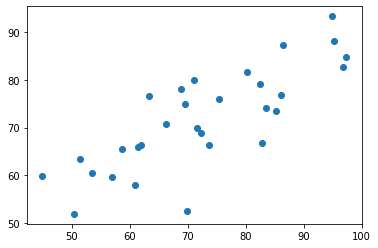

In [27]:
plt.scatter(y_test, y_pred)
plt.show()

In [31]:
# Student studies for 3hrs:
stanscale.inverse_transform(model.predict([[3]]).reshape(-1,1))

array([[80.74671249]])

In [29]:
# Student studies for 12hrs:
stanscale.inverse_transform(model.predict([[12]]).reshape(-1,1))

array([[73.10748024]])

**Model Evaluation**

In [32]:
r2_score(y_test , y_pred)

0.6314498852294589

In [33]:
mean_squared_error(y_test , y_pred)

76.02821098810809

In [34]:
mean_absolute_error(y_test , y_pred)

7.206083573647409